# <center>Sistema Massa-Mola com Oscilação Horizontal</center>
## <center>Solução Analítica Método de Runge Kutta de Ordem 2</center>


Suponha uma mola de constante elástica $k$ e um bloco de massa $m$, com a mola presa horizontalmente à um suporte e ao bloco, em um ambiente que o coeficiente de atrito $\mu$ não é desprezível.

As equações diferenciais para sistema serão:

$$\ddot{x}  =\left (-\frac{k}{m}\right )x + \mu g $$

e

$$\ddot{x}  =\left (-\frac{k}{m}\right )x - \mu g $$

Existem duas equações diferenciais, pois a força de atrito muda de direção, se opondo sempre a direção de movimento do bloco.

Biblioteca pylab para a construção de gráficos

In [1]:
from pylab import *

Criando a função Método de Runge Kutta de Ordem 2

In [2]:
def rk2(y,time,dt,derivs):
    
    k0 = dt * derivs(y,time)
    k1 = dt * derivs(y + k0, time + dt)
    y_next = y + 0.5 * (k0 + k1)
    
    return y_next

Criando constantes

In [3]:
#Número de etapas a serem seguidas
N = 500

#Posição inicial (m)
x0 = 0.2

#Velocidade inicial (m/s)
v0 = 0.0

#Tempo para a simulação (s)
tau = 3.0

#Constante elástica (N/m)
k = 42.0

#Massa do bloco (Kg)
m = 0.25

#Gravidade (m/s^2)
gravity = 9.8

#Coeficiente de Atrito
mu = 0.15

Etapa de tempo

In [4]:
dt = tau/float(N-1)

Tempo para plotagem do gráfico

In [5]:
time = linspace (0 , tau , N) 

Criando uma matriz com N linhas e 2 colunas para armazenar os resultados de cada cálculo. Cada linha de 2 elementos será usada para o estado do sistema em um instante e cada instante é separado pelo tempo dt. O primeiro elemento de cada linha será a posição e o segundo será a velocidade.

In [6]:
y = zeros([N,2])

Condições iniciais

In [7]:
y[0,0] = x0
y[0,1] = v0

Definindo a equação diferencial para este sistema.

Nesta etapa pegamos a equação diferencial de segunda ordem.

$$\ddot{x} = \left (-\frac{k}{m}\right )x \pm \mu g $$

E a transformamos em duas equações diferencias de primeira ordem, introduzindo a velocidade $v$.

$$\dot{x} = v$$

$$\dot{v} = \left (-\frac{k}{m}\right )x \pm \mu g $$

Como a força de atrito muda a direção de acordo com $v$, colocamos condições para cada equação diferencial.


In [8]:
def Spring_Mass(state, time):
    
    g0 = state[1]
    if g0 > 0:
        g1 = -(k/m)*state[0] - gravity*mu
    else:
        g1 = -(k/m)*state[0] + gravity*mu
    
    return array ([g0,g1])

Iniciando os cálculos. O loop é feito apenas para N-1, para que não haja problemas ao abordar o ponto N+1. Aplica-se o Método de Euler para a solução analítica.

In [9]:
for j in range(N - 1):
    y[j+1] = y[j+1] = rk2(y[j], 0, dt, Spring_Mass)

Plotando os resultados.

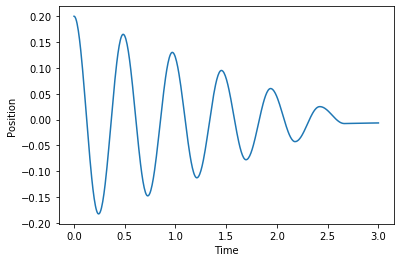

In [10]:
plot (time, y[:,0])
xlabel ('Time') 
ylabel ('Position') 
show()

Referência:

AYARS, Eric et al. Computational Physics With Python. Califórnia: California State University, 2013. 194 p.